# Instrucciones.

En el laboratorio realice las siguientes tareas

* Complete la celda "Datos grupo".
* Lea el enunciado.
* Complete los ejercicios 1, 2 y 3.
* Envie el archivo .ipynb por el modulo de tareas de ucursos en la TAREA: Laboratorio 1 presencial 
* Plazo de entrega:  Miércoles 15 de abril a las 18:00


La parte no presencial del laboratorio corresponde a los ejercicios 4, 5 y 6

* Complete todos los ejercicios
* Envie el archivo .ipynb por el modulo de tareas de ucursos en la TAREA: Laboratorio 1 completo
* Plazo de entrega: Viernes 17 de abril a las 18:00




# Datos grupo

Escriba en esta celda el nombre de cada integrante de su grupo.

- Integrante 1: XXX

- Integrante 2: YYY...


# Empaquetamiento y cubrimiento de figuras en una matriz

Sea $M$ un tablero de tamaño $N\times N$. Una figura $F$ es simplemente un subconjunto de celdas de $M$.
Por ejemplo, la figura $F=\{(2;1),(2;2),(2;3),(3;3)\}$, dibujada abajo para $N=4$ representa una figura similar a una J rotada.


<table style="border-collapse:collapse;border-spacing:0" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:30px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></th><th style="font-family:Arial, sans-serif;font-size:30px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></th><th style="font-family:Arial, sans-serif;font-size:30px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></th><th style="font-family:Arial, sans-serif;font-size:30px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></th></tr><tr><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;background-color:#c0c0c0;color:#ffffff;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;background-color:#c0c0c0;color:#ffffff;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;background-color:#c0c0c0;color:#ffffff;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td></tr><tr><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;background-color:#c0c0c0;color:#000000;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td></tr><tr><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td><td style="font-family:Arial, sans-serif;font-size:30px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;text-align:left;vertical-align:top"></td></tr></table>

En este laboratorio estudiaremos tres problemas muy similares sobre ubicar figuras en un tablero dado.

### Indicación: 
Durante el laboratorio guardaremos las figuras como arreglos de pares ordenados (arreglos de tuplas).
La siguiente función le permitirá graficar figuras pequeñas (es lento la primera vez que lo ejecuta)

In [479]:
#Importar paquetes
using Gadfly
using Random
using Distributions
using JuMP, Gurobi

In [480]:
function plot_figure(N, F)
    M = zeros(N,N)
    for (i,j) in F
       M[i,j] = 1 
    end
    Gadfly.spy(M)
end

plot_figure (generic function with 1 method)

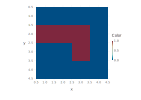

In [481]:
# Graficar una figura de ejemplo
F0=[(2, 1), (2,2), (2,3), (3,3)]
plot_figure(4,F0)

# Ejercicio 1 (presencial)

Consideremos los siguientes problemas

### Problema 1: Empaquetamiento de figuras.

INPUT: $N$

    Un conjunto de figuras $F[1],F[2],..., F[m]$
    
    Pesos no negativos $w_1, w_2, ..., w_m$
       
Tarea: Un **empaquetamiento** es un conjunto de figuras que se puede ubicar simultáneamente en el tablero $M$ sin superponerse.
Suponiendo que el peso de $F[i]$ es $w_i$, encuentre el empaquetamiento de figuras de **mayor** peso posible.


### Problema 2: Cubrimiento del tablero por figuras

INPUT: $N$

    Un conjunto de figuras $F[1],F[2],..., F[m]$

    Pesos no negativos $w_1, w_2, ..., w_m$

Tarea:  Un **cubrimiento** es un conjunto de figuras, cuya unión cubre totalmente el tablero $M$ (aquí se permiten superposiciones). Suponiendo que el peso de $F[i]$ es $w_i$, encuentre el cubrimiento de figuras de **menor** peso total posible.

El PLE para el problema 1 se encuentra abajo, 

\begin{align}
\max& \sum_{k \in [m]}w_kx_k\\
& \sum_{k \in [m]: (i,j) \in F[k]}x_{k}\leq 1, \quad \forall (i,j) \in [N]\times [N]\\
& x_{k}\in\{0,1\} \quad \quad \forall k \in [m]
\end{align}


Escriba a continuacion el PLE para el problema 2.

\begin{align}
\min& \sum_{k \in [m]}w_kx_k\\
& \sum_{k \in [m]: (i,j) \in F[k]}x_{k}\geq 1, \quad \forall (i,j) \in [N]\times [N]\\
& x_{k}\in\{0,1\} \quad \quad \forall k \in [m]
\end{align}


# Ejercicio 2 (presencial)

En este problema debe escribir una función que reciba como entrada el triple $(N,F,w)$ donde $N$ es el tamaño del tablero, $F$ es un arreglo que contiene algunas figuras, y $w$ es un arreglo del mismo largo con los pesos correspondientes.
La función debe resolver el PLE 1 descrito en la parte anterior, y debe devolver el valor objetivo y una lista de índices $J$ tal que la colección $\{F[j]: j \in J\}$ es un empaquetamiento del valor anterior.

Puede completar la plantilla de la siguiente celda


In [482]:
function empaquetamiento(N, F, w)
    #tamaño de los arreglos
    m = size(F)[1]
     
    #crear modelo
    packing = Model()
 
    #setear solver y atributos
    set_optimizer(packing, Gurobi.Optimizer)
    set_optimizer_attributes(packing, "Presolve"=>0, "OutputFlag"=>false)
    
    #crear variables
    @variable(packing, x[1:m], Bin)
    
    #crear restricciones
    @constraint(packing, [i in 1:N, j in 1:N], sum(x[k] for k in 1:m if (i,j) in F[k])<=1)
    
    #crear función objetivo
    @objective(packing, Max, sum(w[k]x[k] for k in 1:m))
    
    #resolver
    optimize!(packing)
            
    #estado de término
    term_status = termination_status(packing)
    is_optimal = term_status == MOI.OPTIMAL
        
    #imprimir solución si se alcanzo el óptimo
    if is_optimal
        #encontrar valor
        valor = objective_value(packing)
        #encontrar conjunto de índices 
        indices = [k for k in 1:m if value(x[k])==1]
        return valor, indices
    else
        #es infactible
        return nothing, nothing
    end
end

empaquetamiento (generic function with 1 method)

# Ejercicio 3 (presencial)

Considere las 3 instancias $(N,F,w)$ generadas en las celda siguiente (se incluye el valor objetivo de la primera instancia para que verifique su respuesta). Pruebe su método en las 3 instancias e imprima la solución de la misma (el valor y la lista de índice de las figuras usadas).
(pd: Si necesita mostrar en pantalla un vector `mi_lista` más largo que el largo máximo de caracteres permitido, puede usar 
`show(IOContext(stdout, :limit=>false), mi_lista)`


| instancia | valor óptimo |
|:---------:|:------------:|
|     1     |      24      |
|     2     |      68      |
|     3     |      234     |

In [483]:
function instance_generator(N, seed)
    Random.seed!(seed)
    F = []
    w = []
    #generar figuras hasta que sea factible cubrir con estas todo el tablero
    unfilled_set = Set([(i,j) for i in 1:N, j in 1:N])
    while length(unfilled_set)>0
        #inicializar peso de la figura como el número de elementos que tendrá
        w_k = rand(1:N)
        #actualizar array de pesos
        push!(w, w_k)
        #inicializar contador
        n_k = 1
        #inicializar figura con un elemento no cubierto
        F_k = [rand(unfilled_set)]
        while n_k < w_k
            #añadir elemento nuevo si este es adyacente al último elemento
            i  = rand(max(F_k[end][1]-1,1):min(F_k[end][1]+1,N))
            j  = rand(max(F_k[end][2]-1,1):min(F_k[end][2]+1,N))
            if !((i,j) in F_k)
                push!(F_k, (i,j))
                n_k = n_k+1
            end
        end
        #ordenar figura 
        sort!(F_k)
        #actualizar lista de figuras
        push!(F, F_k)
        #celdas cubiertas
        F_set  = Set([tuple for F_k in F for tuple in F_k])  
        #actualizar celdas no cubiertas
        unfilled_set = setdiff(unfilled_set, F_set)  
        
    end
    return F, w
        
end       

instance_generator (generic function with 1 method)

In [484]:
 #Instancia 1
 N1=4
 F1=[ [(3, 4), (4, 3), (4, 4)], [(1, 1), (1, 2), (2, 2)], [(2, 1), (2, 2), (3, 2)], [(2, 3), (3, 1), (3, 2), (4, 1)], [(2, 4)], [(1, 4), (2, 3), (2, 4), (3, 4)],  [(1, 3), (2, 2), (3, 2)],  [(4, 2)],  [(3, 3), (4, 4)]]
 w1=[6 6 6 8 2 8 6 2 4]
#La instancia 1 tiene empaquetamiento óptimo 24

 #Instancia 2
 N2 = 10
 F2 = [[(1, 6), (2, 7), (3, 8)], [(4, 7), (5, 6), (5, 7), (5, 8)], [(8, 8), (9, 9), (10, 8), (10, 9)], [(7, 10), (8, 10), (9, 10)], [(1, 1), (1, 2), (2, 2), (3, 3)], [(1, 3), (2, 2), (3, 2)], [(1, 5), (1, 6), (1, 7), (2, 3), (2, 4)], [(2, 2), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3)], [(9, 6), (9, 7), (10, 6), (10, 7)], [(4, 3), (5, 1), (5, 2), (5, 4), (6, 1), (6, 3), (7, 1), (7, 2)], [(1, 4), (2, 4)], [(5, 2), (5, 3), (6, 2), (6, 4), (7, 3), (7, 4), (7, 5), (8, 5)], [(1, 9), (1, 10), (2, 7), (2, 8), (2, 9), (3, 6), (4, 5), (5, 3), (5, 4)], [(9, 8)], [(6, 10)], [(8, 3), (9, 4), (9, 5), (10, 4)], [(4, 6)], [(4, 6), (5, 5)], [(3, 7), (4, 8)], [(2, 9), (3, 8), (3, 9), (3, 10), (4, 7), (4, 8), (4, 9), (4, 10), (5, 9), (5, 10)], [(4, 4)], [(6, 7), (7, 6), (7, 7), (7, 8), (8, 8), (9, 8), (10, 8), (10, 9), (10, 10)], [(8, 2), (8, 3), (8, 4), (9, 1), (9, 3), (9, 4), (9, 5), (10, 3), (10, 4)], [(3, 5), (4, 4), (5, 5), (6, 6)], [(7, 2), (7, 3), (8, 4), (9, 3), (9, 4), (10, 2), (10, 3), (10, 4)], [(1, 8), (2, 8), (2, 9), (3, 9), (3, 10), (4, 10), (5, 9), (6, 9), (7, 10), (8, 10)], [(8, 6), (9, 5), (9, 6), (10, 5)], [(3, 10), (4, 10), (5, 10), (6, 9), (7, 9)], [(6, 5), (7, 4), (8, 4)], [(5, 5), (5, 6), (5, 7), (6, 5), (6, 6), (7, 6), (7, 7), (8, 7)], [(8, 1)], [(5, 9), (6, 8), (6, 9), (6, 10)], [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (3, 2)], [(8, 8), (8, 9), (8, 10), (9, 9), (9, 10), (10, 9)], [(2, 5), (2, 9), (3, 4), (3, 6), (3, 7), (3, 8), (4, 5)], [(9, 2)], [(2, 9), (2, 10), (3, 10), (4, 7), (4, 8), (4, 9), (5, 7), (5, 8), (6, 6), (7, 5)], [(3, 2), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1)]]
 w2 = [3, 4, 4, 3, 4, 3, 5, 10, 4, 8, 2, 8, 9, 1, 1, 4, 1, 2, 2, 10, 1, 9, 9, 4, 8, 10, 4, 5, 3, 8, 1, 4, 8, 6, 7, 1, 10, 8]
 
#Instancia 3
 N3 = 20
 F3 = [[(9, 5), (9, 7), (9, 10), (10, 4), (10, 5), (10, 6), (10, 9), (10, 10), (11, 6), (11, 7), (11, 8), (11, 11), (12, 8), (12, 11), (12, 12)], [(8, 16), (9, 15), (9, 16), (9, 17)], [(16, 8), (17, 8), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (18, 8), (18, 9), (18, 12), (19, 8), (19, 11)], [(8, 19), (8, 20), (9, 19), (9, 20), (10, 19), (10, 20), (11, 17), (11, 18), (11, 19), (11, 20), (12, 17), (12, 19), (13, 18), (14, 17)], [(3, 1), (4, 1), (4, 2), (4, 3), (5, 3), (5, 4), (6, 3), (6, 4), (7, 3), (7, 4), (8, 3), (8, 4), (9, 3)], [(5, 8), (6, 6), (6, 7), (7, 6), (7, 7)], [(9, 5), (9, 6), (10, 4), (10, 5), (10, 6), (11, 4), (12, 5), (13, 6), (13, 7), (14, 6), (15, 7), (16, 5), (16, 7), (17, 4), (17, 6), (18, 4), (18, 5), (19, 4)], [(12, 3), (13, 2), (13, 4), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (15, 1), (15, 2), (15, 3), (15, 5)], [(4, 18), (5, 16), (5, 17), (5, 18), (6, 17), (6, 18), (7, 13), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 19), (9, 14)], [(3, 8), (4, 7), (4, 8), (5, 8), (6, 7)], [(2, 10), (2, 11), (3, 10), (3, 11), (3, 12), (3, 13), (4, 11), (4, 12), (4, 14), (5, 12), (5, 13)], [(13, 12), (13, 13), (13, 14), (13, 15), (14, 13), (14, 14), (14, 15), (14, 16), (15, 15), (15, 16), (16, 14), (16, 15), (16, 16)], [(3, 7), (4, 6), (4, 7), (4, 10), (5, 8), (5, 9)], [(13, 8), (14, 7)], [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 2), (3, 3)], [(16, 3), (16, 4), (16, 5), (16, 6), (17, 2), (17, 5), (18, 1), (18, 2), (18, 5), (18, 7), (18, 8), (18, 9), (19, 2), (19, 5), (19, 6), (19, 8), (19, 10), (20, 9)], [(2, 18), (3, 18), (3, 19), (4, 19), (4, 20), (5, 20), (6, 19), (7, 19), (8, 20), (9, 20), (10, 19), (11, 20), (12, 19), (13, 17), (13, 18), (14, 18)], [(8, 9), (9, 8), (10, 9), (11, 10)], [(12, 7), (13, 6), (14, 5), (15, 4), (15, 5), (16, 4), (16, 5), (16, 6), (17, 4), (17, 6), (18, 4), (18, 5), (19, 5)], [(15, 16), (15, 17), (16, 15), (16, 16), (16, 17), (17, 16), (17, 18), (18, 15), (18, 17), (18, 18), (18, 19), (19, 15), (19, 16), (19, 17), (19, 18), (20, 16), (20, 17)], [(18, 11), (19, 12), (19, 13), (20, 12), (20, 13), (20, 14)], [(8, 12), (8, 13), (9, 12), (9, 13), (10, 14), (10, 15), (11, 14), (11, 15), (12, 15)], [(5, 1), (5, 2), (6, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (10, 2), (10, 3), (11, 1), (11, 2)], [(1, 16), (1, 17), (1, 18), (2, 16), (3, 15), (4, 14), (5, 13), (5, 14), (6, 14), (6, 15), (7, 15), (8, 16), (9, 16), (10, 17)], [(13, 8), (13, 9), (13, 10), (14, 5), (14, 6), (14, 7), (14, 9), (14, 10), (15, 4), (15, 5), (15, 7), (16, 6), (17, 5)], [(2, 4), (3, 3), (3, 4), (4, 3), (4, 4), (5, 2), (5, 3), (6, 2), (6, 3), (7, 1), (7, 2), (7, 3), (8, 1), (9, 1), (9, 2), (10, 2)], [(5, 11), (5, 12), (6, 11), (6, 12), (7, 12), (8, 12), (8, 13), (9, 12), (9, 13), (10, 12)], [(11, 17), (11, 18), (12, 17), (12, 18), (13, 16), (13, 17), (14, 14), (14, 15), (15, 13)], [(19, 7)], [(15, 16), (15, 20), (16, 12), (16, 13), (16, 15), (16, 16), (16, 17), (16, 19), (16, 20), (17, 14), (17, 18)], [(6, 18), (6, 19), (7, 17), (7, 19), (8, 18), (8, 19), (8, 20), (9, 18), (10, 18), (10, 19), (11, 17), (11, 18), (11, 19), (11, 20), (12, 18), (12, 19), (13, 17), (13, 18), (14, 19)], [(6, 13)], [(1, 16), (1, 17), (2, 15), (2, 17), (3, 16), (4, 15), (5, 16), (5, 17)], [(12, 14), (13, 14)], [(18, 14)], [(1, 12), (1, 14), (2, 13), (2, 15), (3, 15), (3, 16), (4, 15)], [(11, 5), (12, 4)], [(14, 9), (14, 10), (15, 8), (15, 9), (16, 9), (16, 10), (17, 7), (17, 9), (18, 6), (18, 7), (18, 8), (19, 6), (19, 7), (19, 8), (20, 8)], [(10, 2), (11, 2), (12, 2), (13, 1), (14, 1), (14, 2), (15, 1), (15, 2), (16, 2), (16, 3), (17, 1)], [(19, 5), (20, 4), (20, 5), (20, 6), (20, 7), (20, 8), (20, 9)], [(4, 13), (4, 14), (4, 20), (5, 14), (5, 15), (5, 19), (5, 20), (6, 16), (6, 20), (7, 17), (7, 18), (7, 19), (8, 18), (8, 19), (8, 20), (9, 19)], [(16, 12), (16, 15), (16, 16), (17, 12), (17, 13), (17, 14), (17, 15), (17, 16), (18, 15), (18, 16), (19, 13), (19, 14), (19, 15), (20, 14), (20, 15)], [(5, 8), (5, 10), (6, 3), (6, 4), (6, 7), (6, 8), (6, 9), (6, 10), (7, 3), (7, 4), (7, 5), (7, 7), (7, 9), (7, 10), (8, 4), (8, 5), (8, 6), (8, 8), (8, 9), (9, 5)], [(3, 20)], [(7, 11), (8, 7), (8, 8), (8, 11), (8, 12), (9, 8), (9, 9), (9, 10), (9, 11), (10, 8), (10, 9), (10, 10)], [(11, 4), (12, 4), (13, 3), (13, 5), (14, 4)], [(3, 5)], [(1, 8), (1, 9), (2, 7), (2, 8), (2, 9), (2, 10), (3, 8), (3, 9), (3, 10), (3, 11), (4, 8), (4, 9)], [(5, 5)], [(2, 6), (2, 8), (2, 9), (3, 6), (3, 7), (3, 8), (3, 10), (4, 9), (4, 10), (4, 11)], [(11, 7), (11, 8), (12, 6), (13, 5), (14, 6), (15, 6)], [(16, 14), (17, 14), (17, 15), (18, 16), (18, 17), (18, 18), (18, 19), (19, 19), (19, 20), (20, 19)], [(10, 15), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)], [(10, 10), (11, 10), (12, 11), (12, 13), (13, 12), (13, 14), (14, 15), (15, 14), (16, 14), (17, 13), (18, 11), (18, 12), (18, 13), (18, 14), (19, 11), (19, 12), (19, 13), (20, 10)], [(7, 18), (7, 20), (8, 17), (8, 18), (8, 19), (9, 16), (10, 15), (10, 16)], [(15, 5), (15, 6), (15, 10), (15, 12), (16, 5), (16, 10), (16, 11), (16, 12), (16, 13), (17, 5), (17, 9), (17, 13), (18, 6), (18, 7), (18, 9), (19, 8)], [(12, 15), (12, 16), (13, 15), (13, 17), (14, 16), (14, 17), (15, 16), (15, 18), (16, 15), (16, 16), (16, 17), (16, 19), (17, 15), (17, 16), (17, 17), (17, 18), (17, 19), (18, 16), (18, 19), (19, 20)], [(19, 13), (19, 15), (19, 16), (19, 20), (20, 14), (20, 17), (20, 18), (20, 19), (20, 20)], [(1, 19), (2, 19), (3, 19), (4, 17), (4, 18)], [(10, 11), (11, 10), (11, 12), (11, 13), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (13, 11), (13, 12), (13, 13)], [(1, 17), (2, 17), (2, 18), (2, 19), (3, 16), (3, 17), (3, 19), (3, 20), (4, 16), (4, 17), (4, 18), (5, 16), (5, 17), (5, 18)], [(1, 7), (2, 5), (2, 6), (2, 7), (3, 6), (4, 5), (4, 7), (5, 5), (5, 6)], [(1, 6), (1, 7), (2, 7), (2, 8), (3, 7)], [(13, 6), (13, 7), (14, 8)], [(6, 12), (6, 13), (7, 13), (7, 14)], [(9, 19), (10, 18), (11, 19), (12, 18), (12, 19), (13, 19), (13, 20), (14, 19), (14, 20)], [(12, 20), (13, 20), (14, 19), (14, 20), (15, 19), (16, 18)], [(9, 8), (10, 7)], [(9, 3), (9, 4)], [(13, 6), (13, 7), (13, 10), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (15, 7), (15, 8), (15, 9)], [(3, 6), (4, 6), (4, 7), (5, 6), (5, 7), (6, 6), (6, 7), (7, 8), (7, 9), (8, 10)], [(6, 5), (7, 4), (8, 5), (8, 6), (8, 7), (9, 6), (9, 7), (10, 7)], [(13, 3), (13, 4), (14, 2), (14, 3), (14, 4), (14, 5), (15, 1), (15, 2), (15, 3), (16, 1)], [(14, 11), (15, 10), (16, 8), (16, 9), (17, 8), (17, 9), (18, 4), (18, 5), (18, 8), (18, 9), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (19, 8), (20, 5), (20, 8)], [(18, 3), (19, 3), (19, 5), (20, 4)], [(11, 7), (11, 8), (12, 8), (13, 8), (14, 9), (15, 9), (15, 10), (16, 8), (16, 9), (16, 10), (17, 9), (18, 10)], [(1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 19), (2, 14), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (3, 19), (4, 18), (4, 19), (5, 18), (5, 19), (6, 18)], [(11, 10), (12, 9), (12, 10), (12, 11), (13, 9), (13, 10)], [(17, 7), (17, 8), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (19, 4), (19, 6), (19, 7), (19, 8), (19, 9), (19, 10), (20, 5), (20, 9), (20, 11)], [(16, 19), (17, 19), (17, 20), (18, 19), (18, 20), (19, 17), (19, 18), (19, 19), (19, 20), (20, 17), (20, 18), (20, 19), (20, 20)], [(2, 12), (3, 12)], [(1, 10), (2, 11), (3, 9), (3, 10), (3, 11), (4, 8), (4, 9), (4, 10), (4, 11), (5, 10), (5, 11)], [(7, 11), (8, 10), (8, 11), (8, 12), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (10, 13)], [(15, 1), (16, 1), (17, 1), (17, 3), (17, 5), (18, 2), (18, 4), (18, 6), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (20, 3), (20, 4), (20, 5), (20, 6)], [(15, 6), (15, 7), (16, 8), (17, 3), (17, 4), (17, 5), (17, 6), (17, 7), (18, 4), (18, 5), (18, 6), (19, 3), (19, 4), (20, 2), (20, 3)], [(1, 20)], [(7, 4), (8, 3), (8, 5), (9, 3), (9, 4), (9, 5), (10, 3), (10, 4), (10, 5), (11, 2), (11, 3), (11, 4), (11, 5), (12, 1), (12, 2), (13, 2), (13, 3)], [(2, 14), (2, 15), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (4, 12), (4, 15)], [(20, 1)], [(14, 5), (15, 4), (15, 7), (15, 8), (15, 9), (15, 11), (16, 4), (16, 5), (16, 6), (16, 8), (16, 10), (16, 12), (17, 5), (17, 6), (
17, 7), (17, 11), (18, 6)], [(4, 2), (5, 1), (5, 3), (6, 2), (7, 3), (8, 2)], [(1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 5), (2, 6), (2, 7), (2, 9), (3, 5), (3, 6), (3, 8), (4, 5), (4, 6), (4, 7)], [(15, 6), (16, 5), (16, 6), (16, 7), (17, 4), (17, 5), (17, 6), (18, 3), (18, 5), (18, 6), (19, 1), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (19, 7), (20, 2), (20, 4), (20, 5)], [(11, 9)], [(5, 13), (5, 15), (6, 14), (6, 15), (7, 14), (8, 14), (8, 15), (8, 16), (9, 13), (9, 14), (9, 16), (9, 17), (10, 15), (11, 16)], [(14, 12), (14, 13), (15, 12), (15, 14), (15, 15), (16, 14), (16, 15), (17, 15), (18, 14), (19, 14), (19, 15), (20, 14), (20, 15)]]
 w3 = [15, 4, 12, 14, 13, 5, 18, 12, 19, 5, 11, 13, 6, 2, 12, 18, 16, 4, 13, 17, 6, 9, 12, 14, 13, 16, 10, 9, 1, 11, 19, 1, 8, 2, 1, 7, 2, 15, 11, 7, 16, 15, 20, 1, 12, 5, 1, 12, 1, 10, 6, 10, 6, 18, 8, 16, 20, 9, 5, 12, 14, 9, 5, 3, 4, 9, 6, 2, 2, 11, 10, 8, 10, 18, 4, 12, 18, 6, 16, 13, 2, 11, 10, 17, 15, 1, 17, 9, 1, 17, 6, 15, 20, 1, 14, 13]
;


In [485]:
valor, indices = empaquetamiento(N1, F1, w1)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(24.0, [1, 2, 4, 5, 8])

In [486]:
valor, indices = empaquetamiento(N2, F2, w2)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(68.0, [2, 4, 5, 7, 9, 13, 15, 17, 19, 22, 24, 25, 28, 36, 38])

In [487]:
valor, indices = empaquetamiento(N3, F3, w3)
show(IOContext(stdout, :limit=>false), (valor, indices))

Academic license - for non-commercial use only
Academic license - for non-commercial use only
(234.0, [1, 2, 3, 5, 8, 15, 23, 28, 33, 37, 41, 44, 47, 49, 59, 63, 65, 67, 70, 71, 80, 81, 82, 86, 89, 93, 94, 96])


# Ejercicio 4 (no presencial)

Escriba una función `cubrimiento(N, F, w)` similar a la del ejercicio 2 para resolver el problema de cubrimiento de peso mínimo.
En el caso que la instancia no admita cubrimiento, su función debe imprimir a pantalla la palabra `"Infactible"` y devolver null (`return nothing, nothing`)

Además, pruébela en las 3 instancias del ejercicio 3 e imprima sus resultados.

| instancia | valor óptimo |
|:---------:|:------------:|
|     1     |      46      |
|     2     |      143     |
|     3     |      750     |


In [488]:
function cubrimiento(N, F, w) 
    #tamaño de los arreglos
    m = size(F)[1]
     
    #crear modelo
    covering = Model()
 
    #setear solver y atributos
    set_optimizer(covering, Gurobi.Optimizer)
    set_optimizer_attributes(covering, "Presolve"=>0, "OutputFlag"=>false)
    
    #crear variables
    @variable(covering, x[1:m], Bin)
    
    #crear restricciones
    @constraint(covering, [i in 1:N, j in 1:N], sum(x[k] for k in 1:m if (i,j) in F[k])>=1)
    
    #crear función objetivo
    @objective(covering, Min, sum(w[k]x[k] for k in 1:m))
    
    #resolver
    optimize!(covering)
            
    #estado de término
    term_status = termination_status(covering)
    is_optimal = term_status == MOI.OPTIMAL
        
    #imprimir solución si se alcanzo el óptimo
    if is_optimal
        #encontrar valor
        valor = objective_value(covering)
        #encontrar conjunto de índices 
        indices = [k for k in 1:m if value(x[k])==1]
        return valor, indices
    
    else
        #es infactible
        return nothing, nothing
                                
    end
                                
end

cubrimiento (generic function with 1 method)

In [489]:
valor, indices = cubrimiento(N1, F1, w1) 

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(46.0, [1, 2, 3, 4, 6, 7, 8, 9])

In [490]:
valor, indices = cubrimiento(N2, F2, w2) 

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(143.0, [7, 8, 9, 10, 12, 13, 17, 21, 22, 23  …  27, 28, 30, 32, 33, 34, 35, 36, 37, 38])

In [491]:
valor, indices = cubrimiento(N3, F3, w3) 

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(750.0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 11  …  87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

# Ejercicio 5 (no presencial)

Considere ahora el problema de empaquetar la mayor cantidad de tetrominos (figuras de tetris), en un tablero de $N\times N$ 
que ya tiene algunas celdas ocupadas (y por lo tanto, no se puede poner figuras de tetris que toquen esas celdas).

Para simplificar su problema, el siguiente arreglo *Tetris* contiene las 19 piezas (incluyendo rotaciones) posibles en tetris, alineadas lo más arriba y a la izquierda posible.
Los arreglos *alto* y *ancho* tienen los altos y anchos de dichas piezas.


In [492]:
#arreglo Tetris
Tetris=[]
push!(Tetris,[(1,1),(2,1),(3,1),(4,1)]) #I 
push!(Tetris,[(1,1),(1,2),(1,3),(1,4)]) #I + 180
push!(Tetris,[(1,1),(1,2),(2,1),(2,2)]) #O
push!(Tetris,[(1,1),(1,2),(1,3),(2,2)]) #T
push!(Tetris,[(1,2),(2,2),(3,2),(2,1)]) #T + 90
push!(Tetris,[(1,2),(2,1),(2,2),(2,3)]) #T + 180
push!(Tetris,[(1,1),(2,1),(3,1),(2,2)]) #T + 270
push!(Tetris,[(1,1),(2,1),(3,1),(3,2)]) #L
push!(Tetris,[(1,1),(1,2),(1,3),(2,1)]) #L + 90
push!(Tetris,[(1,1),(1,2),(2,2),(3,2)]) #L + 180
push!(Tetris,[(1,3),(2,1),(2,2),(2,3)]) #L + 270
push!(Tetris,[(1,2),(2,2),(3,1),(3,2)]) #J
push!(Tetris,[(1,1),(2,1),(2,2),(2,3)]) #J + 90
push!(Tetris,[(1,1),(1,2),(2,1),(3,1)]) #J + 180
push!(Tetris,[(1,1),(1,2),(1,3),(2,3)]) #J + 270
push!(Tetris,[(1,2),(1,3),(2,1),(2,2)]) #S
push!(Tetris,[(1,1),(2,1),(2,2),(3,2)]) #S + 180
push!(Tetris,[(1,1),(1,2),(2,2),(2,3)]) #Z 
push!(Tetris,[(1,2),(2,1),(2,2),(3,1)]) #Z + 180
alto=zeros(Int8,19)
ancho=zeros(Int8,19)
for k in 1:19
   alto[k]=maximum([i for (i,j) in Tetris[k]])
   ancho[k]=maximum([j for (i,j) in Tetris[k]])
end

#puede ver las piezas descomentando las siguiente lineas
#for i in 1:19
#    display(plot_figure(4,Tetris[i]))
#end

Cada pieza se puede mover en el tablero y note que tiene una posicion máxima horizontal/vertical de modo de no salirse del tablero.
Por ejemplo, para obtener la pieza Tetris[2] trasladada a la posición $(i,j)$
usted puede moverla $i-1$ unidades a la derecha y $j-1$ hacia abajo. En Julia esto se puede hacer como sigue:

In [493]:
function mover(Q, i, j)
   return [(a+i-1, b+j-1) for (a,b) in Q]
end

mover (generic function with 1 method)

In [494]:
mover(Tetris[2],2,3)

4-element Array{Tuple{Int64,Int64},1}:
 (2, 3)
 (2, 4)
 (2, 5)
 (2, 6)

En este problema debe escribir una función que reciba como entrada una matriz  booleana (sus casilleros contienen true / false) donde $M[i,j]$ es *true* si la celda $(i,j)$ ya está ocupado. 

La función debe encontrar el máximo número de piezas que puede empaquetar en los casilleros no ocupados de $M$, y debe devolver este número (valor objetivo) y una lista de las figuras trasladadas usadas.

Por ejemplo, considere la matriz creada en la siguiente celda

In [495]:
M = Bool[0 0 0 0; 0 1 0 0; 0 0 1 0; 0 0 0 0]

4×4 Array{Bool,2}:
 0  0  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  0

In [496]:
#Una solución con 3 piezas corresponde a la lista
[mover(Tetris[2],1,1), mover(Tetris[10],2,3), mover(Tetris[6],3,1)]

3-element Array{Array{Tuple{Int64,Int64},1},1}:
 [(1, 1), (1, 2), (1, 3), (1, 4)]
 [(2, 3), (2, 4), (3, 4), (4, 4)]
 [(3, 2), (4, 1), (4, 2), (4, 3)]

In [497]:
#Así que su programa podría entregar como salida
[3, 
[[(1, 1), (1, 2), (1, 3), (1, 4)], [(2, 3), (2, 4), (3, 4), (4, 4)], [(3, 2), (4, 1), (4, 2), (4, 3)]]]

2-element Array{Any,1}:
 3                                                                                                                                 
  Array{Tuple{Int64,Int64},1}[[(1, 1), (1, 2), (1, 3), (1, 4)], [(2, 3), (2, 4), (3, 4), (4, 4)], [(3, 2), (4, 1), (4, 2), (4, 3)]]

In [498]:
function get_figures(M, Tetris, alto, ancho)
    L = size(Tetris)[1]
    N = size(M)[1]
    #celdas de M que están ocupadas
    mask = [(i,j) for i in 1:N, j in 1:N if M[i,j]==true]
    #Array donde se guardarán las figuras
    F = Array{Tuple{Int64, Int64}}[]
    #Generar todas las figuras que caben en el tablero M
    for k in 1:L, i in 1:N+1-alto[k], j in 1:N+1-ancho[k]
        F_kij = mover(Tetris[k], i, j)
        #Solo agregar figuras que no posean celdas de M que están ocupadas
        if length(intersect(F_kij, mask))==0
            push!(F, F_kij)   
        end          
    end
    return F
end

get_figures (generic function with 1 method)

In [499]:
function empaqueta_tetris(M)
    N = size(M)[1]
    F = get_figures(M, Tetris, alto, ancho)
    w = ones(length(F))
    valor, indices = empaquetamiento(N, F, w)
    if valor != nothing && indices != nothing
        return valor, F[indices]
    else
        return nothing, nothing
    end
end

empaqueta_tetris (generic function with 1 method)

In [500]:
empaqueta_tetris(M)

Academic license - for non-commercial use only
Academic license - for non-commercial use only


(3.0, Array{Tuple{Int64,Int64},N} where N[[(1, 1), (2, 1), (3, 1), (3, 2)], [(3, 4), (4, 2), (4, 3), (4, 4)], [(1, 2), (1, 3), (2, 3), (2, 4)]])

# Ejercicio 6 (no presencial)

Pruebe su función en las siguientes 50 instancias de $10 \times 10$ generadas al azar.
Guarde su resultado en un arreglo `Salidas` (es decir `Salidas[i]` debe ser el arreglo con las dos salidas de su función)

In [534]:
# Generador de Instancias al azar
Random.seed!(1234)
Instancia=[]
for i = 1:50
    push!(Instancia,rand(Binomial(1, i/100),10,10))
end

In [536]:
#ejemplo: 
Instancia[10]

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [537]:
Salidas = [empaqueta_tetris(M) for M in Instancia];

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [554]:
Salidas[34]

(17.0, Array{Tuple{Int64,Int64},N} where N[[(4, 10), (5, 10), (6, 10), (7, 10)], [(1, 9), (1, 10), (2, 9), (2, 10)], [(4, 1), (4, 2), (4, 3), (5, 2)], [(6, 7), (7, 7), (8, 7), (7, 6)], [(6, 8), (7, 8), (8, 8), (8, 9)], [(1, 1), (1, 2), (1, 3), (2, 1)], [(5, 5), (5, 6), (5, 7), (6, 5)], [(6, 3), (6, 4), (7, 4), (8, 4)], [(8, 10), (9, 10), (10, 9), (10, 10)], [(8, 2), (9, 2), (9, 3), (9, 4)], [(1, 6), (1, 7), (1, 8), (2, 8)], [(3, 7), (3, 8), (3, 9), (4, 9)], [(4, 6), (4, 7), (4, 8), (5, 8)], [(2, 2), (2, 3), (3, 1), (3, 2)], [(1, 5), (2, 5), (2, 6), (3, 6)], [(2, 4), (3, 4), (3, 5), (4, 5)], [(9, 5), (9, 6), (10, 6), (10, 7)]])

In [539]:
function plot_figure2(N, F)
    M = zeros(N,N)
    for F_k in F, (i,j) in F_k
        M[i,j] = 1
    end
    Gadfly.spy(M)
end

plot_figure2 (generic function with 1 method)

In [559]:
Instancia[34]

10×10 Array{Int64,2}:
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1
 0  0  0  1  0  0  0  0  0  0
 1  0  1  1  0  0  0  0  1  0
 0  1  0  0  0  0  0  0  1  0
 1  1  1  0  1  0  0  0  1  0
 1  0  1  0  1  1  0  0  0  0
 1  0  0  0  0  0  1  1  1  0
 1  1  1  0  0  0  0  1  0  0

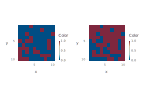

In [674]:
#azul vacío, rojo relleno
p1 = Gadfly.spy(Instancia[34]) #intancia
p2 = plot_figure2(10, Salidas[34][2])#solución
hstack(p1,p2)

In [555]:
optimo = (100-32)/4

17.0